
Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

In [2]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [3]:
print(X.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [4]:
print(y.describe())

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


In [5]:
print('Missing values in features:\n', X.isnull().sum())
print('Missing values in target:', y.isnull().sum())

Missing values in features:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
Missing values in target: 0


In [6]:
print('Sample feature records:')
print(X.head())

Sample feature records:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [7]:
print('Sample target values:')
print(y.head())

Sample target values:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(16512, 8)
(4128, 8)


In [9]:
# Add a bias column to features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]

# Normal Equation for OLS: theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train.values

# theta_best[0] is intercept, theta_best[1:] are coefficients

In [36]:
# Predict on test set
y_pred_scratch = X_test_bias @ theta_best

In [11]:
rmse_scratch = np.sqrt(np.mean((y_test.values - y_pred_scratch) ** 2))
mae_scratch = np.mean(np.abs(y_test.values - y_pred_scratch))
r2_scratch = 1 - np.sum((y_test.values - y_pred_scratch) ** 2) / np.sum((y_test.values - np.mean(y_test.values)) ** 2)

print("From Scratch - RMSE:", rmse_scratch)
print("From Scratch - MAE:", mae_scratch)
print("From Scratch - R²:", r2_scratch)

From Scratch - RMSE: 0.7455813830132428
From Scratch - MAE: 0.5332001304929292
From Scratch - R²: 0.5757877060319201


In [12]:
print("Intercept:", theta_best[0])
print("Coefficients:", theta_best[1:])

Intercept: -37.02327770618458
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R² score:', r2)

RMSE: 0.7455813830127763
MAE: 0.5332001304956565
R² score: 0.575787706032451


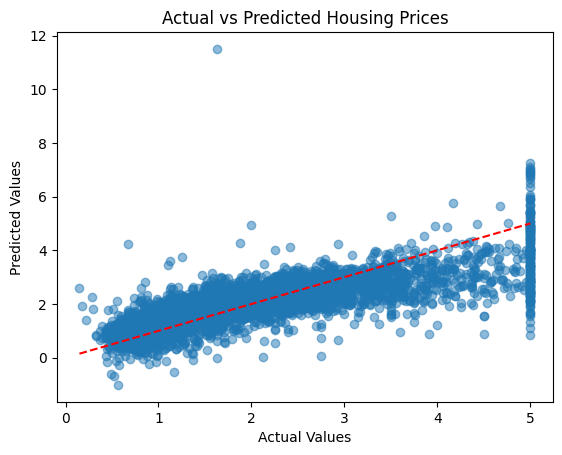

In [14]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

In [15]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
def print_metrics(name, y_pred):
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print(f"{name} MAE:", mean_absolute_error(y_test, y_pred))
    print(f"{name} R²:", r2_score(y_test, y_pred), '\n')

print_metrics("Ridge", y_pred_ridge)
print_metrics("Lasso", y_pred_lasso)

Ridge RMSE: 0.7455567442814779
Ridge MAE: 0.5331931195789733
Ridge R²: 0.5758157428913684 

Lasso RMSE: 0.8243961598848472
Lasso MAE: 0.6222011605619467
Lasso R²: 0.48136113250290735 



Ridge Regression performance nearly identical to standard Linear Regression
Lasso Regression performance worse than Ridge/Linear

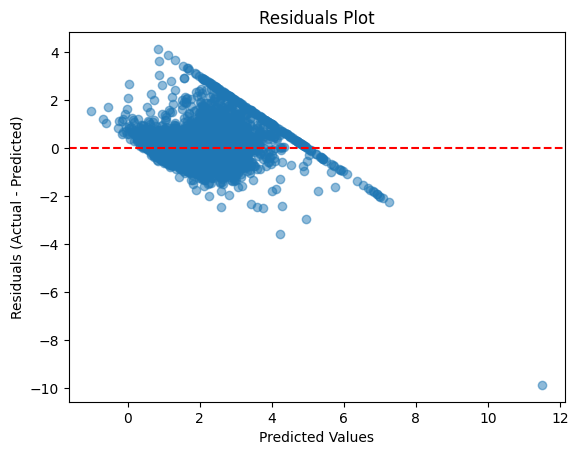

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("Polynomial R²:", r2_score(y_test, y_pred_poly))

Polynomial RMSE: 0.6813967449720241
Polynomial R²: 0.6456819727519338


add an interaction feature to see if there is any improvement

In [18]:
X_train_inter = X_train.copy()
X_test_inter = X_test.copy()
# Create a new interaction feature
X_train_inter['MedInc_AveRooms'] = X_train_inter['MedInc'] * X_train_inter['AveRooms']
X_test_inter['MedInc_AveRooms'] = X_test_inter['MedInc'] * X_test_inter['AveRooms']

# OPTIONAL: You can create more such interaction features, e.g.
X_train_inter['MedInc_Population'] = X_train_inter['MedInc'] * X_train_inter['Population']
X_test_inter['MedInc_Population'] = X_test_inter['MedInc'] * X_test_inter['Population']

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_inter)
X_test_scaled = scaler.transform(X_test_inter)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_inter = lin_reg.predict(X_test_scaled)
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("With Interaction RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_inter)))
print("With Interaction R²:", r2_score(y_test, y_pred_inter))

With Interaction RMSE: 0.7417365278373137
With Interaction R²: 0.580151627573012


In [20]:
# Create interaction feature for train and test sets
X_train_inter = X_train.copy()
X_test_inter = X_test.copy()
X_train_inter['MedInc_AveRooms'] = X_train_inter['MedInc'] * X_train_inter['AveRooms']
X_test_inter['MedInc_AveRooms'] = X_test_inter['MedInc'] * X_test_inter['AveRooms']

# Scale with the interaction term included
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_inter)
X_test_scaled = scaler.transform(X_test_inter)

# Train and evaluate
lin_reg_inter = LinearRegression()
lin_reg_inter.fit(X_train_scaled, y_train)
y_pred_inter = lin_reg_inter.predict(X_test_scaled)

print("Interaction RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_inter)))
print("Interaction R²:", r2_score(y_test, y_pred_inter))

Interaction RMSE: 0.7420870632181685
Interaction R²: 0.5797547036536489


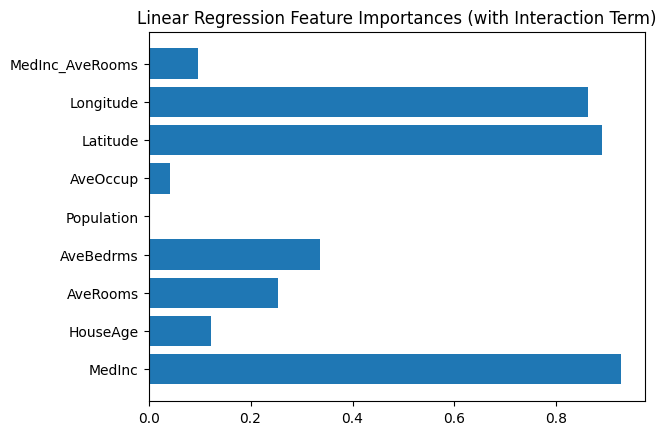

In [22]:
importances = abs(lin_reg_inter.coef_)
plt.barh(X_train_inter.columns, importances)
plt.title('Linear Regression Feature Importances (with Interaction Term)')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5)
print('CV Mean R^2:', cv_score.mean())

CV Mean R^2: 0.6116049958737737


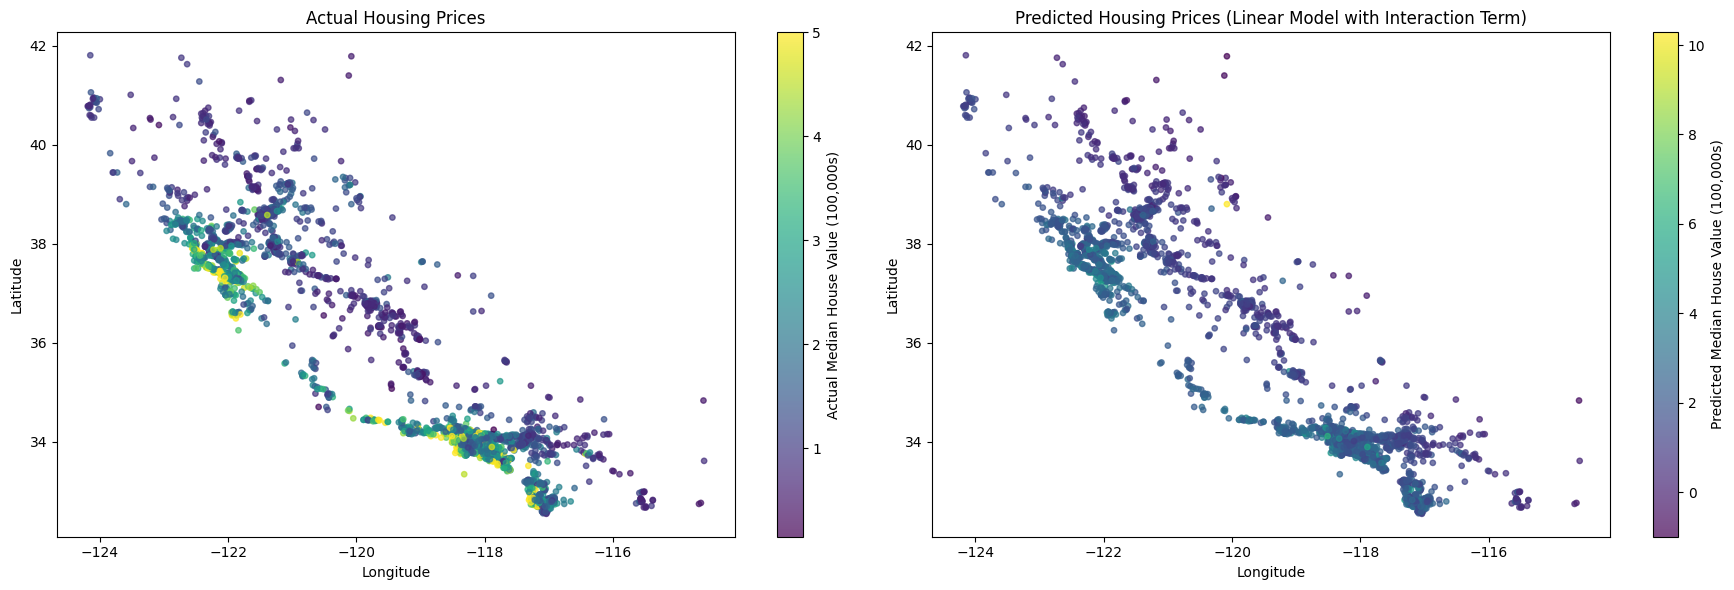

In [24]:
lons = X_test['Longitude']
lats = X_test['Latitude']
y_true = y_test
y_pred = lin_reg_inter.predict(X_test_scaled)

plt.figure(figsize=(18, 6))

# Actual Prices
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(lons, lats, c=y_true, cmap='viridis', s=15, alpha=0.7)
plt.colorbar(scatter1, label='Actual Median House Value (100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Actual Housing Prices')

# Predicted Prices
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(lons, lats, c=y_pred, cmap='viridis', s=15, alpha=0.7)
plt.colorbar(scatter2, label='Predicted Median House Value (100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted Housing Prices (Linear Model with Interaction Term)')

plt.tight_layout()
plt.show()

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions of machine learning models. It shows how much each feature contributed to the prediction for a single example, using values based on cooperative game theory. SHAP values help us understand which features make the prediction higher or lower, and by how much, for each data point

In [26]:
import shap

feature_name_mapping = {
'MedInc': 'Median Income',
'HouseAge': 'House Age',
'AveRooms': 'Average Rooms',
'AveBedrms': 'Average Bedrooms',
'Population': 'Population',
'AveOccup': 'Average Occupancy',
'Latitude': 'Latitude',
'Longitude': 'Longitude',
'MedInc_AveRooms': 'Median Income × Average Rooms',
'MedInc_Population': 'Median Income × Population'
}

# Create dataframes with friendly names for SHAP analysis
X_test_inter_friendly = X_test_inter.rename(columns=feature_name_mapping)
X_train_inter_friendly = X_train_inter.rename(columns=feature_name_mapping)

print("Original feature names:", X_test_inter.columns.tolist())
print("Friendly feature names:", X_test_inter_friendly.columns.tolist())

# Create explainer with friendly-named data
explainer_friendly = shap.Explainer(lin_reg_inter, X_train_inter_friendly)

# Get SHAP values for all test data using friendly names
shap_values_friendly = explainer_friendly(X_test_inter_friendly)

# Initialize SHAP JavaScript
shap.initjs()

Original feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_AveRooms']
Friendly feature names: ['Median Income', 'House Age', 'Average Rooms', 'Average Bedrooms', 'Population', 'Average Occupancy', 'Latitude', 'Longitude', 'Median Income × Average Rooms']



 Bar plot:


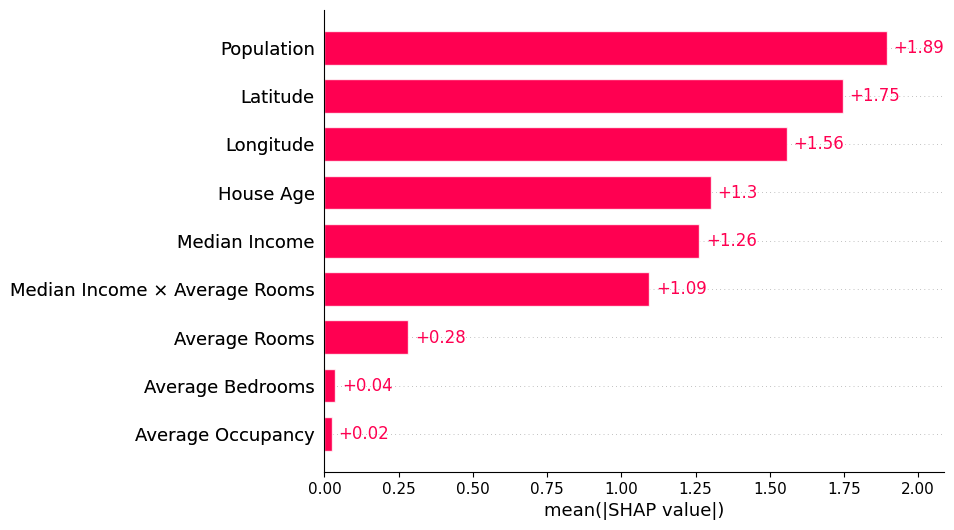

In [28]:
print("\n Bar plot:")
shap.plots.bar(shap_values_friendly)


 Waterfall plot:


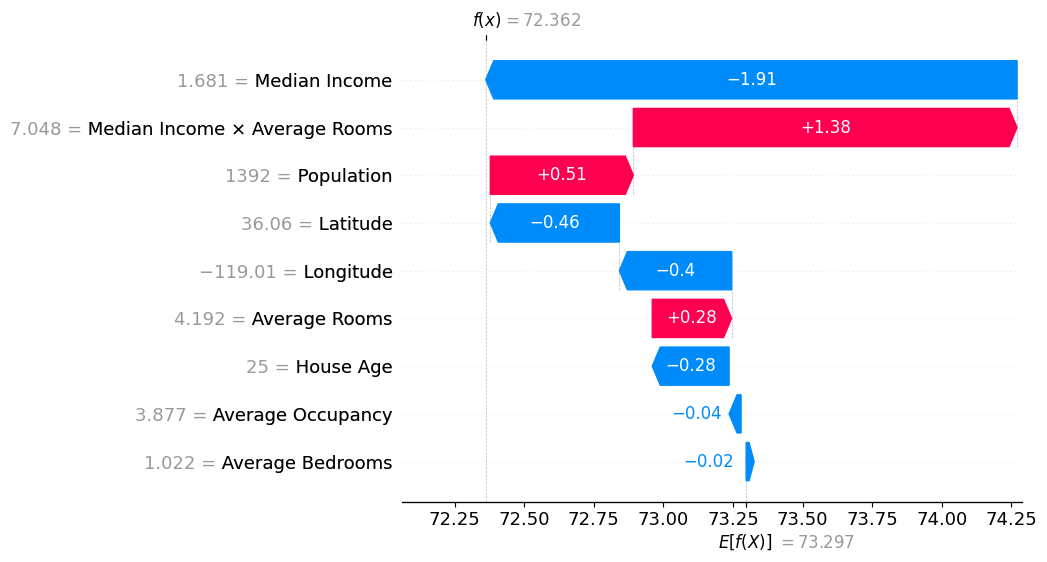

In [27]:
print("\n Waterfall plot:")
shap.plots.waterfall(shap_values_friendly[0])


Beeswarm plot:


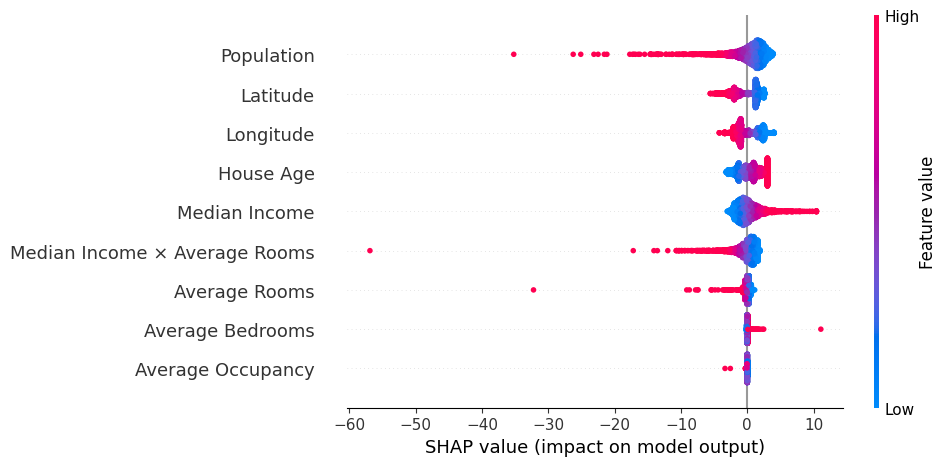

In [29]:
print("\nBeeswarm plot:")
shap.plots.beeswarm(shap_values_friendly)


Dependence plot:


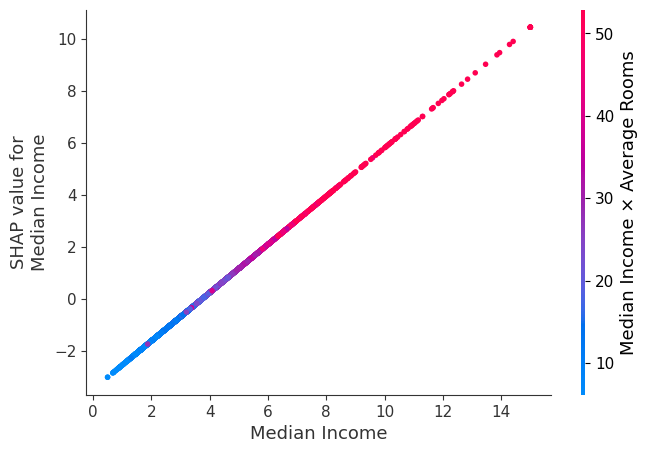

In [30]:
print("\nDependence plot:")
shap.dependence_plot("Median Income", shap_values_friendly.values, X_test_inter_friendly)